## COMP5721M: Programming for Data Science

## Coursework 3: Data Analysis Project


# E-Commerce Insights and Analysis


* Rakshan Fathima, sc19r2f@leeds.ac.uk
* Yash Gupta, mm23yg@leeds.ac.uk
* Ankon Bhowmick, mm23a2b@leeds.ac.uk
* Cheuk Yin Lau, mm23cyl@leeds.ac.uk

# Project Plan

## **The Data**

To derive meaningful insights and accurate predictions for an E-Commerce company, a comprehensive analysis of various crucial variables is important. These variables comprise of a diverse range of factors integral to understanding customer behaviour, market dynamics, and operational strategies. Analysing data is the first step in ensuring the delivery of precise business solutions and informed decision-making.

The E-Commerce dataset chosen consists of four separate files, namely of Customer Data, Marketing Spend of the business, and the Discount Coupons created by the business for promotional strategies. A detailed Online Sales data frame is linked via unique customer IDs to multiple transaction IDs, showcasing product-specific details, quantities, prices, and delivery charges. The dataset is rich with diverse information essential for comprehensive analysis. It includes detailed customer information capturing unique IDs, gender, location, and tenure. The discount data offers insights into monthly product categories, associated coupons, and discount percentages. Marketing-spend tracks offline and online expenditures over time.

This E-Commerce dataset is collected from Kaggle; it is clean without any missing or duplicate values. Certain columns will receive closer attention, and to meet the objectives, relevant tables will be merged in the Program Code for detailed analysis. Overall the dataset enables robust customer-centric and transactional analysis.

**Note: Please use the [Github](https://github.com/rakshan-fathima/E-Commerce-Analysis) link to view the dataset.**


The tables below provide descriptions of the datasets:

1. **Customers_Data** - This table contains information about the customers.

| Column Name | Description | Data Type |
| ----------- | ----------- | ----------- |
|CustomerID|Unique Identifier of a customer|int64|
|Gender|Gender of a customer|object|
|Location|Location of the customer in USA|object|
|Tenure_Months|Customer Tenure in months|int64|

2. **Online_Sales** - This table contains information about the transactions, price and sales of products.

| Column Name | Description | Data Type |
| ----------- | ----------- | ----------- |
|CustomerID|Unique Identifier of a customer|int64|
|Transaction_ID|Unique Identifier of a transaction made by a customer|int64|
|Transaction_Date|Date of transaction|object|
|Product_SKU|Unique Identifier of a product|object|
|Product_Description|Description of a product|object|
|Product_Category|Category the product belongs in|object|
|Quantity|Number of products sold|int64|
|Avg_Price|Price per quantity|float64|
|Delivery_Charge|Charges for delivery|float64|
|Coupon_Status|Any discount codes used by the customer (Used/Not Used/Clicked)|object|

3. **Marketing_Spend** - This table gives information of the company's marketing spends - offline and online

| Column Name | Description | Data Type |
| ----------- | ----------- | ----------- |
|Date|The date of marketing spend done by the company|object|
|Offline_Spend|Marketing spend on offline services such as Radio, Television, Newspapers, Brochures|int64|
|Online_Spend|Marketing spend on online services such as Instagram ads, Facebook, Google Ads|float64|

4. **Discount_Coupon** - The table contains information about the coupons created by the business for promotional strategies.

| Column Name | Description | Data Type |
| ----------- | ----------- | ----------- |
|Month| Discount coupon applied in that month|object|
|Product_Category|ategory the product belongs in|object|
|Coupon_Code|Coupon Code for a product category and month|object|
|Discount_pct|Discount Percentage for the coupon|int64|

---

## **Project Aim and Objectives**

The primary aim of this project is to harness data-driven insights to enhance business strategies and optimise customer-centric approaches.

The project seeks to enhance approaches to how a business interacts with its market and customers. It utilises _classification_ techniques to categorise sales data based on geographical locations. This involves _segregating_ data items (sales) into classes (regions) according to their characteristics (sales patterns within specific areas). Optimising marketing strategies aims to _identify correlations_ between different attributes (marketing spend, coupon utilization, and sales data) within the dataset and evaluates the effectiveness of marketing spend by considering coupon usage and monthly sales, enabling smarter budget allocation. Further, it involves a combination of _classification_ and _visualization_ techniques to employ Customer Segmentation analysis for refining customer profiles, allowing for customised strategies to enhance customer loyalty and engagement. To ensure customer growth, the project enables the _retrieval of information_ about customer lifetime value by evaluating specific queries (relating to transactional and customer data) the aim is to integrate transactional and customer data to interpret Customer Lifetime Value. This guides efforts toward nurturing relationships with high-value customers for sustained growth.

 Ultimately, these efforts seek to not just _refine marketing approaches_ but essentially _transform how businesses understand and engage with their customers_, encouraging lasting relationships and driving substantial business growth.


#### **Specific Objectives**

* __Objective 1:__ _To utilise customer location data in order to analyse regional sales, this helps target customers more efficiently._
* __Objective 2:__ _Determine whether marketing spending is effective, analyse coupons sales per month._
* __Objective 3:__ _Using Customer Segmentation to understand customer profiles to target specific products to different groups._
* __Objective 4:__ _Combine transaction data with customer data to analyse Customer Lifetime Value (CLV)._
---

## **System Design**

### Architecture


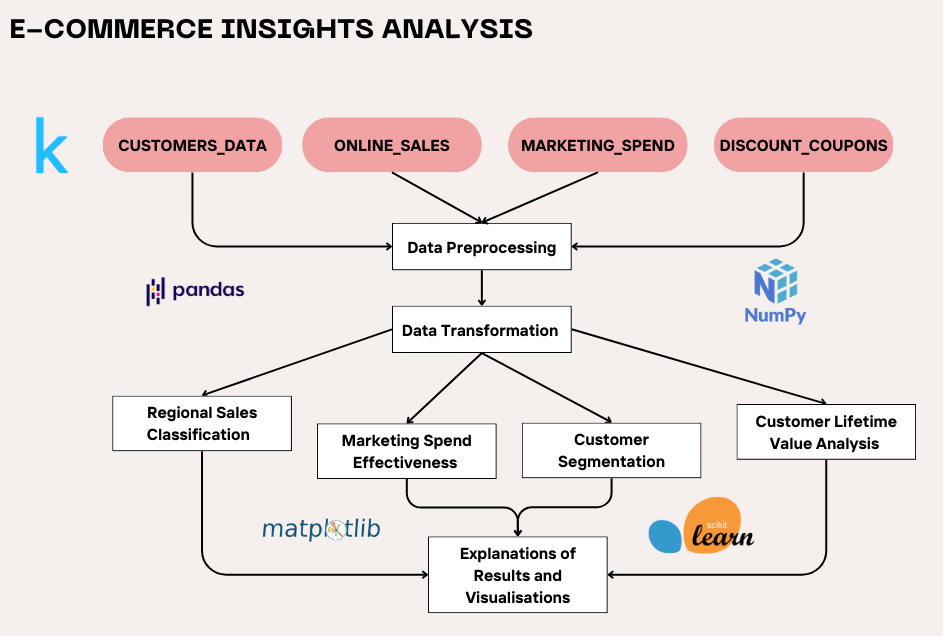

The datasets; **Customers_Data**, **Online_Sales**, **Marketing_Spend** and **Discount_Coupons** need to be analysed to derive insights and solutions. The datasets are first pre-processed by checking the datasets for null and duplicate values. The data types of the variables within the tables are checked to ensure it is all consistent and appropriate for analysis. After this, relevant data transformations are performed such as merging Customers_Data and Online_Sales datasets based on unique Customers_ID to analyse customer's spending patterns. There are a few new columns and dataframes created when relevant to help with calculations. Following this, analysis and interpretation of the results is conducted through visualisations to explore the objectives.  

### Processing Modules and Algorithms

Utilising Pandas, the first step involves the creation of dataframes: `customers`, `discounts`, `marketing`, and `online_sales`

- **Data Preprocessing**:

     *   **Assess datasets for missing values**: Null values are absent across all columns of the dataframes.
     *   **Assess datasets for duplicate values**: No duplicates are found in the dataframes.
     * **Data Type Consistency**: This check ensures uniform data types across columns. Data type consistency across the dataframes appears adequate, matching the expected types for their respective columns. However, potential conversion of the `Transaction_Date` column to a datetime format will be required for smoother analysis and computation across the datasets.

-  **Data Transformation**:
     * **Merging Dataframes**: The merge operation between the `customers` and `online_sales` datasets based on the shared column `CustomerID` aims to combine both datasets' information for unified analysis, revealing spending patterns and customer behavior insights.
     * **Additional columns or dataframes**: Few new columns such as `Total_Spend`, `Avg_Revenue_Per_Transaction`, `CLV` and dataframe `customers_rfm` containing RFM(Recency, Frequency, Monetary) is created to capture relevant metrics for each customer.

- **Data Analysis**: The analysis includes regional sales classification, assessing marketing spend effectiveness, modeling customer segmentation, and evaluating customer lifetime value.

- **Explanations of Results and Visualisation**: The results are interpreted and visually presented to enhance understanding and derive insights from the analysis.
---

# Program Code


#### _Importing Libraries_
_Importing libraries used in this project._




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

#### _Importing Datasets_

_Reading the datasets and storing it in Pandas Dataframes._

In [2]:
customers=pd.read_excel("CustomersData.xlsx")
discounts=pd.read_csv("Discount_Coupon.csv")
marketing=pd.read_csv("Marketing_Spend.csv")
online_sales=pd.read_csv("Online_Sales.csv")


_The commands below have been used to show if there are any null values in the dataframes._

In [3]:
customers.isnull().sum()

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [4]:
discounts.isnull().sum()

Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

In [5]:
marketing.isnull().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [6]:
online_sales.isnull().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

For each of the dataframes, we observe the absence of null values for every column.

_The commands below have been used to show if there are any duplicate values in the dataframes._

In [7]:
customers.duplicated().sum()

0

In [8]:
discounts.duplicated().sum()

0

In [9]:
marketing.duplicated().sum()

0

In [10]:
online_sales.duplicated().sum()

0

For each of the dataframes, we observe the absence of duplicate values.

To check if datatypes of all columns are all consistent and accurate:

In [11]:
customers.info()
discounts.info()
marketing.info()
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  --

#### _Merging Dataframes_

_This following cell combines the customer database with online sales data, utilizing the shared unique identifier, CustomerID, found in both tables to merge them together_

In [12]:
Customer_Database=customers.merge(online_sales,on='CustomerID')

_The table below shows an overview of the tables after it is merged._

In [13]:
Customer_Database.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,M,Chicago,12,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,M,Chicago,12,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,M,Chicago,12,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,M,Chicago,12,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


#### _Additional Columns or Dataframes_

_To determine the amount spent in total by the customers, a new column `Total_Spend` is created. The value is calculated using the formula:_

`Total_Spend = Quantity*Avg_Price + Delivery_Charges`

In [14]:
online_sales['Total_Spend'] = (online_sales['Quantity'] * online_sales['Avg_Price']) + online_sales['Delivery_Charges']

In [15]:
Customer_Database['Total_Spend'] = Customer_Database['Quantity'] * (Customer_Database['Avg_Price'] + Customer_Database['Delivery_Charges'])

## **Objective 1**:
_To utilise customer location data in order to analyse regional sales; this helps target customers more efficiently._

This code provides a simple summary of customer distribution and expenditure per city, which can be valuable for understanding regional trends and forming marketing strategies.

Revenue generated and total number of customer from each city is calculated in the following cell  

In [16]:
count_chicago=sum_chicago=count_cali=sum_cali=count_ny=sum_ny=count_nj=sum_nj=count_dc=sum_dc=0 #initialising every customer count and money spend by customer to 0

for x,y in Customer_Database.iterrows(): #iterating through data for matches and increamenting count of customers and money spend by them
    if y[2]=='Chicago': #il state code
      count_chicago=count_chicago+1
      sum_chicago= sum_chicago + y[10]
    if y[2]=='California':#cali state code
      count_cali=count_cali+1
      sum_cali= sum_cali + y[10]
    if y[2]=='New York':#ny state code
      count_ny=count_ny+1
      sum_ny = sum_ny + y[10]
    if y[2]=='New Jersey': #NJ state code
      count_nj=count_nj+1
      sum_nj= sum_nj + y[10]
    if y[2]=='Washington DC': # WA state code
      count_dc=count_dc+1
      sum_dc= sum_dc + y[10]
count=[count_chicago,count_cali,count_ny,count_nj,count_dc] # storing count values
sum=[sum_chicago,sum_cali,sum_ny,sum_nj,sum_dc] # storing sales values
city_count={'Chicago':count_chicago, 'California':count_cali, 'New York':count_ny, 'New Jersey':count_nj, 'Washington DC':count_dc}# no of customers per city
expenditure_sum={'Chicago':sum_chicago, 'California':sum_cali, 'New York':sum_ny, 'New Jersey':sum_nj, 'Washington DC':sum_dc}#revenue generated per city
print(city_count)
print(expenditure_sum)

{'Chicago': 18380, 'California': 16136, 'New York': 11173, 'New Jersey': 4503, 'Washington DC': 2732}
{'Chicago': 954156.8499999892, 'California': 844933.7099999966, 'New York': 574321.179999992, 'New Jersey': 239317.7799999989, 'Washington DC': 151895.68000000063}


## **Objective 2**
_Analysis of effectiveness of coupons and marketing_

**Analysing the effect of discounts on sales**


1. Formatting df `discounts`: Replace month names with corresponding integers, rename product category column to avoid clash while merging dataframes
2. Formatting df `online_sales`: Change Date dtype to datetime, extract month from Date.
3. Merge discounts on `online_sales` to get discount rate for each transaction.
4. Calculate sales amount and sales amount after discount.
5. Groupby month to get month-wise record of no. of transactions, total sales(before and after discount), and average sales value per transaction.




In [17]:
#Replace month names with integers
discounts_2=discounts.copy()
month_dict={"Jan":1,"Feb":2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}
discounts_2.Month.replace(month_dict,inplace=True)
discounts_2.rename({'Product_Category':'Product_cat'},axis=1,inplace=True)

#Format date, create new column containing the month of transaction
online_sales_2=online_sales.copy()
online_sales_2.Transaction_Date=pd.to_datetime(online_sales_2.Transaction_Date, format='%m/%d/%Y')
online_sales_2['Month']=np.nan
for i in range(0,online_sales_2.shape[0]):
    online_sales_2.loc[i,'Month']=int(online_sales_2.loc[i,'Transaction_Date'].month)
online_sales_2.Month=online_sales_2.Month.astype(dtype='int64',copy=False)

#Add discount rates using df discounts
online_sales_2['disc_pct']=np.zeros(shape=(online_sales_2.shape[0],1))
for i in range(0,online_sales_2.shape[0]):
    if(online_sales_2.iloc[i].Coupon_Status=='Used'):
        temp=discounts_2[discounts_2.Product_cat==online_sales_2.iloc[i].Product_Category]
        if(online_sales_2.iloc[i].Transaction_Date.month in temp.Month.values):
            online_sales_2.loc[i,'disc_pct']=temp[temp.Month==online_sales_2.iloc[i].Transaction_Date.month].Discount_pct.values[0]

#Create total sales amount and after discount sales amount columns
online_sales_2["T_amount"]=online_sales_2['Quantity']*online_sales_2['Avg_Price']+online_sales_2['Delivery_Charges']
online_sales_2["T_amount_disc"]=online_sales_2['Quantity']*online_sales_2['Avg_Price']*(1-online_sales_2['disc_pct']/100)+online_sales_2['Delivery_Charges']


#Create new dataframe containing month-wise no. of transactions, total sales amount, discounted sales amount, and Average Sales amount
disc_pct_n=online_sales_2[online_sales_2.disc_pct!=0].groupby(by='Month').disc_pct.count()
disc_pct_n.rename('disc_pct_n',inplace=True)
monthly_1=pd.concat([online_sales_2.groupby(by='Month').CustomerID.count(),online_sales_2.groupby(by='Month').T_amount.sum(),online_sales_2.groupby(by='Month').T_amount_disc.sum(),online_sales_2.groupby(by='Month').disc_pct.sum(),disc_pct_n],axis=1)
monthly_1['avg_sales']=monthly_1['T_amount_disc']/monthly_1['CustomerID']
monthly_1['disc']=monthly_1['disc_pct']/(monthly_1['disc_pct_n'])
monthly_1.rename({'CustomerID':'Transactions','T_amount':'Total_sales','T_amount_disc':'Total_sales_disc'},axis=1,inplace=True)

In [18]:
monthly_1

,Transactions,Total_sales,Total_sales_disc,disc_pct,disc_pct_n,avg_sales,disc
Month,,,,,,,
1,4063,462866.90,449895.080,13700.0,1370,110.729776,10.0
2,3284,360036.40,340613.066,21680.0,1084,103.718960,20.0
3,4346,410408.03,376441.466,43740.0,1458,86.617917,30.0
4,4150,443100.16,429659.757,14140.0,1414,103.532472,10.0
5,4572,349159.59,330270.284,29500.0,1475,72.237595,20.0
6,4193,358594.96,326425.795,42240.0,1408,77.850178,30.0
7,5251,421362.00,409349.716,17430.0,1743,77.956526,10.0
8,6150,462309.94,434199.774,41560.0,2078,70.601589,20.0
9,4288,401553.82,361565.770,44610.0,1487,84.320375,30.0


In [19]:
def o2_v1():
    plt.figure()
    monthly_1.Total_sales.plot.bar(color='Orange')
    monthly_1.Total_sales_disc.plot.bar()
    plt.ylabel("Sales")
    plt.title("Sales per month")
    plt.legend(['Discount','Actual Sales'])

**Analysing effectiveness of marketing spend**


1. Creating a df from `online_sales` containing sales data for each day.
2. Merge new df `daily_online_sales` with `marketing`.
3. Extract month in merged df `marketing_sales`, group by month to get a month-wise record for marketing spend and sales.



In [20]:
#Dataframe with total sales for each day
daily_online_sales=online_sales_2.groupby(by="Transaction_Date").T_amount_disc.sum()
daily_online_sales=daily_online_sales.to_frame()
daily_online_sales.reset_index(inplace=True)
daily_online_sales.rename({"Transaction_Date":'Date'},axis=1,inplace=True)

#Merge daily sales with df marketing to create new df marketing_sales
marketing.Date=pd.to_datetime(marketing.Date, format='%m/%d/%Y')
marketing_sales=marketing.merge(daily_online_sales,on='Date')

#Extract month from date, calculate total marketing spend in marketing_sales
marketing_sales['Month']=np.nan
for i in range(0,marketing_sales.shape[0]):
    marketing_sales.loc[i,'Month']=int(marketing_sales.loc[i,'Date'].month)
marketing_sales.Month=marketing_sales.Month.astype(dtype='int64',copy=False)

marketing_sales['Total_marketing']=marketing_sales['Offline_Spend']+marketing_sales['Online_Spend']

#Create new df monthly which contains monthly sales and markting spend
monthly=marketing_sales.groupby(by='Month')[marketing_sales.columns[[1,2,3,5]]].sum()
monthly.rename({'T_amount_disc':'Total_sales_disc'},axis=1,inplace=True)

In [21]:
def o2_v2():
    x=monthly[monthly.columns[3]].values
    y=monthly[monthly.columns[2]].values
    print('Coefficient of determination:',np.round(np.corrcoef(x, y)[0,1],decimals=3))
    a, b = np.polyfit(x, y, 1)
    plt.scatter(x, y)
    plt.xlabel("Marketing Spend")
    plt.ylabel("Total Sales")
    plt.title("Sales v/s Marketing")
    plt.plot(x, a*x+b,color='red')

## **Objective 3**:

_Using Customer Segmentation to understand customer profiles to target specific products to different groups._




This code performs data pre-processing and transformation, to create a dataframe of customer RFM for later model training:

In [22]:
# A list of all customer ID
customer_id = list(set(customers['CustomerID']))

# Calculate total spend for each sale
#online_sales['Total_Spend'] = (online_sales['Quantity'] * online_sales['Avg_Price']) + online_sales['Delivery_Charges']

# Transform transacrion date into datetime format & calculate most recent transaction in number of days from 1/1/2020
transaction_date = online_sales['Transaction_Date'].copy()
days_from_now = []
for i in range(len(transaction_date)):
    transaction_date[i] = pd.to_datetime(transaction_date[i],format='%m/%d/%Y')
    days_from_now.append((pd.to_datetime("01/01/2020",format='%m/%d/%Y')-transaction_date[i]).days)
online_sales['Transaction_Date'] = transaction_date
online_sales['Days_from_Now'] = days_from_now

# Create a new dataframe for RFM of each customer (RFM: most recent transaction, frequency, total spendings)
frequency = []
most_recent_transaction = []
total_spending = []
for i in range(len(customer_id)):
    frequency.append(len(set(online_sales[online_sales['CustomerID']==customer_id[i]]['Transaction_Date'])))
    most_recent_transaction.append(min(online_sales[online_sales['CustomerID']==customer_id[i]]['Days_from_Now']))
    total_spending.append((online_sales[online_sales['CustomerID']==customer_id[i]]['Total_Spend'].sum()))
customer_rfm = pd.DataFrame({'Customer_ID':customer_id,'Frequency':frequency,'Most_Recent_Transaction':most_recent_transaction,'Total_Spending':total_spending})


Below shows the first 5 rows of the `customer_rfm` dataframe for model building:

In [23]:
customer_rfm.head()

,Customer_ID,Frequency,Most_Recent_Transaction,Total_Spending
0,16385,2,272,969.50
1,16387,1,91,51.97
2,16393,4,240,1520.46
3,16395,2,97,6962.09
4,16401,1,118,812.72


This code below splits the data into 80% training set and 20% testing set (randomly by setting a random seed for reproducible model outputs), and performs noralization on each variable:

In [24]:
# Train-test split (80/20 ratio)
from sklearn.model_selection import train_test_split
train, test = train_test_split(customer_rfm, test_size=0.2, random_state=1)

# Normalize the data by attributes before training (max-min normalization)
train_normalized = train[['Frequency','Most_Recent_Transaction','Total_Spending']]
train_normalized = (train_normalized-train_normalized.min())/(train_normalized.max()-train_normalized.min())

test_normalized = test[['Frequency','Most_Recent_Transaction','Total_Spending']]
test_normalized = (test_normalized-test_normalized.min())/(test_normalized.max()-test_normalized.min())

Below shows the first 5 rows of the normalized training dataframe:

In [25]:
train_normalized.head()

,Frequency,Most_Recent_Transaction,Total_Spending
1320,0.030303,0.870879,0.032294
98,0.030303,0.340659,0.036599
1265,0.030303,0.093407,0.020571
331,0.000000,0.829670,0.005600
735,0.000000,0.587912,0.006188


The code below defines a function (`model_training_testing`) with an input of k value (`n_cluster`) for model training and testing, returning training and testing results (`y_train`, `y_test`), number of each class from training and testing (`class_count_train`, `class_count_test`), and silhouette scores (`silhouette_train`, `silhouette_test`):

In [26]:
def model_training_testing(n_cluster):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, max_iter=100).fit(train_normalized)

    # Training results
    y_train = np.array(kmeans.labels_)

    # Testing results
    y_test = kmeans.predict(test_normalized)

    # Number of data in each cluster
    class_count_train = []
    class_count_test = []
    for i in range(0,n_cluster):
        class_count_train.append(np.sum(y_train==i))
        class_count_test.append(np.sum(y_test==i))

    # Model evaluation metric: silhouette_score
    silhouette_train = silhouette_score(train_normalized,y_train,metric='euclidean')
    silhouette_test = silhouette_score(test_normalized,y_test,metric='euclidean')

    return y_train, y_test, class_count_train, class_count_test, silhouette_train, silhouette_test

The code below builds models for k=2,3,4,5 and save the silhoutte scores:

In [27]:
model_k2 = model_training_testing(2)
model_k3 = model_training_testing(3)
model_k4 = model_training_testing(4)
model_k5 = model_training_testing(5)
silhouette_score_train = [model_k2[4],model_k3[4],model_k4[4],model_k5[4]]
silhouette_score_test = [model_k2[5],model_k3[5],model_k4[5],model_k5[5]]

Define functions `silhouette_score_plot`, `class_distribution_plot` and `pairplot` for results visualisation:

In [28]:
# Silhouette Score for different k
def silhouette_score_plot():
    plt.figure(figsize=(5,4))
    plt.plot([2,3,4,5],silhouette_score_train,marker='o',label="Training")
    plt.plot([2,3,4,5],silhouette_score_test,marker='o',label="Testing")
    plt.xticks(range(2,6))
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for different k")
    plt.legend(fontsize=12)
    plt.show()
    plt.close()

# Distribution of Clusters
def class_distribution_plot(class_count,train_or_test):
    plt.figure(figsize=(5,5))
    plt.pie(class_count,labels=np.arange(0,len(class_count)),autopct='%1.1f%%')
    plt.title("Distribution of Cluster from Model (%s)"%train_or_test,fontsize=15)
    plt.show()
    plt.close()

# Pairplot visualising clusters and distributions of all attributes
def pairplot(df,y,title):
    result_df = df
    result_df['Cluster'] = y
    plt.rcParams["figure.figsize"] = [20, 20]
    plt.rcParams["figure.autolayout"] = True
    p = sns.pairplot(result_df.iloc[:,[1,2,3,4]],hue='Cluster',palette="tab10")
    p.axes[2,0].set_xlim((0,50))
    p.axes[2,1].set_xlim((0,400))
    p.axes[0,2].set_xlim((0,350000))
    p.fig.suptitle(title)
    p._legend.set_bbox_to_anchor((0.97, 0.17))

## **Objective 4**

_To combine transaction data with customer data to analyse Customer Lifetime Value (CLV)._

This objective utilises `Customer_Database` which is a merged dataframe of Customers and Online Sales data.

The code below performs calculations related to customer lifetime value (CLV) based on a customer database.

1. **Average Revenue per Customer:** Calculates the average revenue per customer by grouping with CustomerID and then taking the mean of the `Total_Spend` column in the customer database.
2. **Total Transactions per Customer:** Groups the data by `CustomerID` and counts the number of transactions per customer, giving the total number of transactions made by each customer.
3. **Tenure per Customer:** Groups the data by `CustomerID` and finds the maximum `Tenure_Months` value, representing the maximum duration of engagement for each customer.
4. **Purchase Frequency per Customer:** Calculates the purchase frequency per customer by dividing the total number of transactions by the tenure in months.
5. **CLV Approximation:** Estimates customer lifetime value by multiplying the average revenue per transaction, purchase frequency, and tenure (in months) for each customer. It creates a new column named `CLV` in the `Customer_Database`.
6. **Summing CLV per Customer:** Aggregates the CLV values per customer by grouping the data by `CustomerID` and summing the `CLV` values. The result is stored in the `clv_per_customer` variable, which contains the aggregated `CLV` for each customer.

In [29]:
# Calculate Average Revenue Per Transaction per Customer
avg_revenue_per_customer = Customer_Database.groupby('CustomerID')['Total_Spend'].mean().reset_index()
avg_revenue_per_customer.columns = ['CustomerID', 'Avg_Revenue_Per_Customer']

# Calculate Total Transactions per Customer
total_transactions_per_customer = Customer_Database.groupby('CustomerID').size().reset_index(name='Total_Transactions')

# Calculate Tenure per Customer
tenure_per_customer = Customer_Database.groupby('CustomerID')['Tenure_Months'].max().reset_index()

# Merge the calculated metrics
clv_data = pd.merge(avg_revenue_per_customer, total_transactions_per_customer, on='CustomerID')
clv_data = pd.merge(clv_data, tenure_per_customer, on='CustomerID')

# Calculate Purchase Frequency per Customer
clv_data['Purchase_Frequency'] = clv_data['Total_Transactions'] / clv_data['Tenure_Months']

# Calculate CLV Approximation per Customer
clv_data['CLV'] = clv_data['Avg_Revenue_Per_Customer'] * clv_data['Purchase_Frequency'] * clv_data['Tenure_Months']

# Sum CLV per Customer
clv_per_customer = clv_data[['CustomerID', 'CLV']]

The following code converts the `Transaction_Date` column in the `Customer_Database` DataFrame to a datetime format using `pd.to_datetime` and converts it to month names.
It then calculates aggregation by grouping the month, number of unique customers and their total spend.

In [30]:
# Convert Transaction_Date to datetime
Customer_Database['Transaction_Date'] = pd.to_datetime(Customer_Database['Transaction_Date'])

# Extract month and year from Transaction_Date and convert it to month names
Customer_Database['Month'] = Customer_Database['Transaction_Date'].dt.strftime('%b')

# Group by month and calculate number of unique customers and total spend
grouped_data = Customer_Database.groupby('Month').agg({'CustomerID': 'nunique', 'Total_Spend': 'sum'}).reset_index()

# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' to categorical data with predefined order
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)

# Sort the dataframe based on the categorical order
grouped_data = grouped_data.sort_values('Month')

This function, `plot_obj4_totalspend()`, generates a combined bar and line plot showing the number of customers and total spend per month. It generates bars representing the number of customers for each month and a line plot depicting the total spend for each month.

In [31]:
def plot_obj4_totalspend():
  # Plotting
  fig, ax1 = plt.subplots(figsize=(10, 6))
  # Plot number of customers over each month (bar plot)
  bars = ax1.bar(grouped_data['Month'], grouped_data['CustomerID'], color='skyblue', label='Number of Customers')

  # Adding labels to the bar plot
  for bar in bars:
      yval = bar.get_height()
      ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')

  ax1.set_ylabel('Number of Customers')
  ax1.set_xlabel('Month')
  ax1.set_title('Number of Customers and Total Spend per Month')

  # Create a second y-axis for total spend (line plot)
  ax2 = ax1.twinx()
  line = ax2.plot(grouped_data['Month'], grouped_data['Total_Spend'], marker='o', linestyle='-', color='orange', label='Total Spend')

  # Adding labels to the line plot
  for i, txt in enumerate(grouped_data['Total_Spend']):
     formatted_value = '${:,.2f}'.format(txt)
     ax2.annotate(formatted_value, (grouped_data['Month'][i], grouped_data['Total_Spend'][i]), textcoords="offset points", xytext=(0,10), ha='center')

  ax2.set_ylabel('Total Spend')

  # Show legend for both plots
  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax2.legend(lines + lines2, labels + labels2, loc='upper right')

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

The following code onverts the `Transaction_Date` column in the `Customer_Database` DataFrame to datetime format and assigns it to the `Transaction_Data` column in the `clv_data` DataFrame. It then extracts the year and month, creating a new column named 'YearMonth' in the clv_data.

Further it, **groups CLV over time** using the average: `clv_over_time = clv_data.groupby('YearMonth')['CLV'].mean()`.
This operation generates a time series that represents the average Customer Lifetime Value (CLV) per month over the available data.

In [32]:
clv_data['Transaction_Data'] = pd.to_datetime(Customer_Database['Transaction_Date'])
clv_data['YearMonth'] = clv_data['Transaction_Data'].dt.to_period('M')
clv_over_time = clv_data.groupby('YearMonth')['CLV'].mean()

The function `plot_obj4_clvovertime()` generates a line plot showing the trends of Customer Lifetime Value (CLV) over time

In [33]:
def plot_obj4_clvovertime():
    # Plot CLV trends over time
    plt.figure(figsize=(10, 6))
    clv_over_time.plot(kind='line', marker='o')
    plt.title('CLV Trends Over Time')
    plt.xlabel('Time Period')
    plt.ylabel('Average CLV')
    plt.grid(True)
    plt.show()

# Project Outcome

## **Objective 1:**
_**Using location data to understand regional preferences and tailor marketing efforts to certain geographical areas.**_





In [34]:
Customer_Database['Location'].unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

**List of cities where customers are located or purchases are being made are used for analyzing customer distribution.**

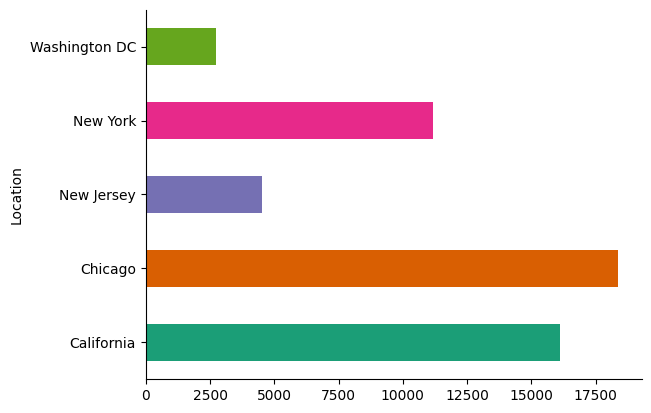

In [35]:
Customer_Database.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


The horizontal bar chart shows the number of customers in the United States by location. The number of customers are highest in Chicago (18380) than in any other state. The next highest states are California(16136),New York (11173), New Jersey (4503), and Washington, D.C. (2732).


The chart shows that there is a significant variation in the number of customers in different states.



In [68]:
fig = px.choropleth(locations=["CA", "WA", "NY","IL","NJ"], locationmode="USA-states", scope="usa")
fig.update_layout(autosize=False,width=500,height=500,margin=dict( l=50,r=50, b=100,t=100, pad=4))
fig.update_layout(title_text = 'Demography of customers',  geo_scope='usa') # limite map scope to USA
fig.show()


Highlighted on the map above are California (CA), Washington (WA), New York (NY), Illinois (IL), and New Jersey (NJ).All the customers are distributed across these five US states.


In [69]:
fig = go.Figure(data=go.Choropleth( locations=["IL","CA","NY","NJ","WA"], # Spatial coordinates
                                   z =count, # no of customers in each state
                                  locationmode = 'USA-states', # set of locations match entries in `locations`
                                  colorscale = 'Greens',
                                  colorbar_title = "No of users",))
fig.update_layout(title_text = 'Distribution of Customers',  geo_scope='usa') # limit map scope to USA
fig.update_layout(autosize=False,width=500,height=500,margin=dict( l=50,r=50, b=100,t=100, pad=4))
fig.show()

The choropleth map visualises the number of users in different states in the USA.

- Darker shades indicate a higher number of users in a state.

- The color bar on the side provides a reference for the number of users corresponding to different color intensities.

This map is a useful visualisation to understand the distribution of users across different states.
Illinois has the maximum number of customers, while Washington DC has the least. This difference could result from more effective marketing strategies in Illinois or superior customer engagement and retention efforts. Other states might be influenced by different factors that requires further analysis.


In [70]:
fig = go.Figure(data=go.Choropleth(locations=["IL","CA","NY","NJ","WA"], # Spatial coordinates
                                   z =sum, # sales information per state
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'Reds',
                                   colorbar_title = "USD",))
fig.update_layout(autosize=False,width=500,height=500,margin=dict( l=50,r=50, b=100,t=100, pad=4))
fig.update_layout(title_text = 'Sales Distribution',  geo_scope='usa') # limit map scope to USA
fig.show()

The choropleth map visualizes the total sales per state in the USA.

- Darker shades indicate higher total sales in a state.

- The color bar on the side provides a reference for the total sales corresponding to different color intensities.

- This map is a useful visualization to understand the distribution of total sales across different states. Given Illinois' largest customer base, it generates the highest sales.



Scatter plot to study the relation between no of customers and sales information

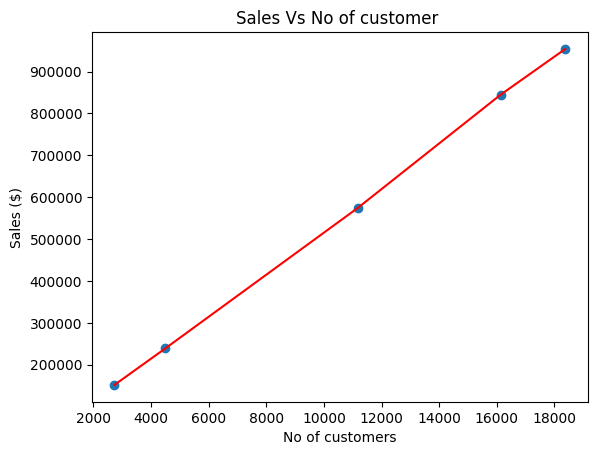

In [40]:
fig, ax = plt.subplots()
ax.scatter(count, sum)
ax.plot(count,sum, color = 'r')
ax.set(xlabel='No of customers', ylabel='Sales ($)',title='Sales Vs No of customer ')
plt.show()

A linear trend illustrates a consistent increase in sales with a growing customer count. This trend indicates the website's efficiency in converting customer numbers into sales.

In [71]:
fig = go.Figure(data=go.Choropleth(locations=["IL","CA","NY","NJ","WA"], # Spatial coordinates
                                    z =np.divide(sum,count), # average sale per customer per state
                                    locationmode = 'USA-states', # set of locations match entries in `locations`
                                    colorbar_title = "USD",))
fig.update_layout(autosize=True,width=500,height=500,margin=dict( l=50,r=50, b=100,t=100, pad=4))
fig.update_layout(title_text = 'Average Sale Distribution',  geo_scope='usa') # limit map scope to USA
fig.show()

The choropleth map visualizes the average money spent per user from each state in the USA.

- Darker shades indicate a higher average spending per customer in a state.
- The color bar on the side provides a reference for the average spending corresponding to different color intensities.

This map is a useful visualization to understand the distribution of average spending per user across different states.

An interesting trend emerges when plotting the average money spent per user from each state. Despite Illinois hosting a large customer base contributing to substantial overall sales, individual customers in Washington and New Jersey exhibit a potentially higher average spending capacity.

## **Objective 2**

In [42]:
monthly_1.disc

Month
1     10.0
2     20.0
3     30.0
4     10.0
5     20.0
6     30.0
7     10.0
8     20.0
9     30.0
10    10.0
11    20.0
12    30.0
Name: disc, dtype: float64

In [43]:
discounts_2.groupby(by='Month').Discount_pct.unique()

Month
1     [10]
2     [20]
3     [30]
4     [10]
5     [20]
6     [30]
7     [10]
8     [20]
9     [30]
10    [10]
11    [20]
12    [30]
Name: Discount_pct, dtype: object

In [44]:
monthly_1[monthly_1.columns[[0,1,2,5]]]

,Transactions,Total_sales,Total_sales_disc,avg_sales
Month,,,,
1,4063,462866.90,449895.080,110.729776
2,3284,360036.40,340613.066,103.718960
3,4346,410408.03,376441.466,86.617917
4,4150,443100.16,429659.757,103.532472
5,4572,349159.59,330270.284,72.237595
6,4193,358594.96,326425.795,77.850178
7,5251,421362.00,409349.716,77.956526
8,6150,462309.94,434199.774,70.601589
9,4288,401553.82,361565.770,84.320375


The above table shows the month-wise record for the number of transactions, total sales value pre-discount, actual sales value after discount, and the average sales value of a transaction. It is important to note that out of each month has only one value for discount percentage, as seen from the modified online sales data, and confirmed by finding the unique values of discount percentage for each month in the original df discounts.

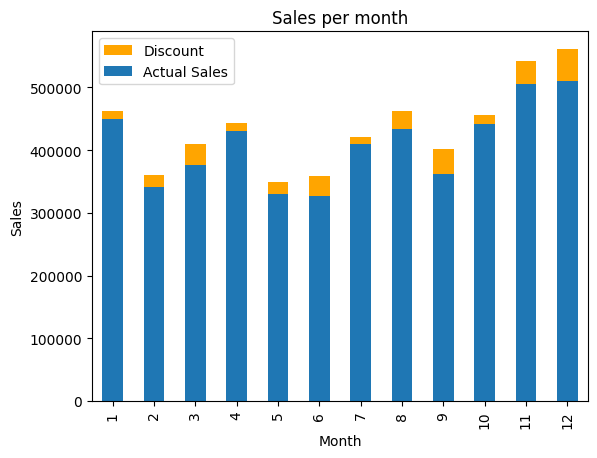

In [45]:
o2_v1()

We observe high discount values for the months March, June, September, and December. This is to be expected, as the discount percentage in these months is 30%. What is unusual though is the spike in sales in the months succeeding the above mentioned months. A high sales value in the months of January, November, and December can be explained by the holiday seasons in those months, such as Thanksgiving, Christmas, and New Year's. Similarly,  July, which only has 10% discount coupons has significantly higher sales than June, which has 30% discount coupons. This can be explained by Independence Day celebrations in July.

It is safe to say that discount coupons have a limited effect on motivating customers and driving sales. Instead, holiday seasons seem to enjoy a high level of sales, and high discount rates combined with the festive occasions, as seen in December, can skyrocket sales.

Coefficient of determination: 0.799


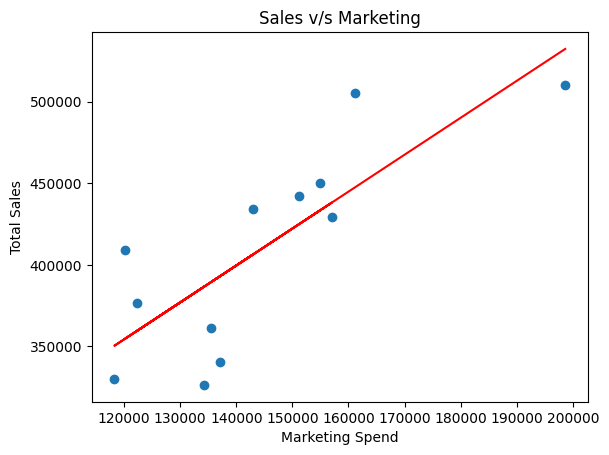

In [46]:
o2_v2()

The above scatter plot shows the Total sales amount against the total marketing spend for each month. A linear increasing trend can be observed as the months progress. To further this analysis, a line of best fit has been fit to the data, plotted as a red line. The coeffecient of determination is 0.799, representing high positive correlation

## **Objective 3**




Customers are clustered into different groups based on RFM segmentation conducted in this section. RFM segmentation is the acronym for Recency, Frequency and Monetary-based segmentation. Recency is defined as the number of days since the last transaction, frequency is the number of transactions in the year 2019, and monetary value is the total spending in the year 2019. After the customers are segmented, we can offer them different classes of membership (e.g. standard, silver, gold, etc.), according to their values towards our company based on RFM. The "Online_Sales.csv" and the "CustomerData.xlsx" datasets are processed to extract the RFM information of every individual customer. 1,468 customers were recorded in the datasets. Clustering is then performed to separate the customers into k different groups based on their RFM habits. K-Means is chosen to be the algorithm for this task as we would like to investigate the clustering performances of different numbers of clusters so as to determine the optimal number of groups. In this task, silhouette score is used to be the evaluation metric for the models. Models with k=2,3,4,5 are trained and tested with a train-test ratio of 80/20. Below is the silhouette score for the test data and train data for each k.

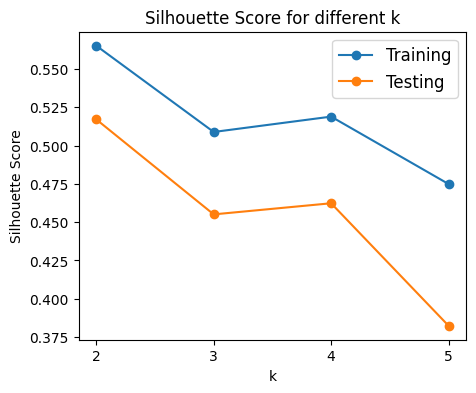

In [47]:
silhouette_score_plot()

It is observed that the silhouette scores for k=2 are the highest for both the training and testing sets (0.57 and 0.51 respectively). Silhouette scores for k=4 are the worst and they improve slightly from k=4 to k=5. However, we think that separating customers into two target groups is not the best business strategy for our objective. Based on the fact that the silhouette scores drop greatly from k=3 to k=4 and k=3 has better scores than k=5, we decided to separate the customers into 3 target groups. Scores for k=3 are 0.52 for the training set and 0.45 for the testing set.

The plot below shows the distribution of clusters (0,1,2) from the k=3 models for the training and testing data:

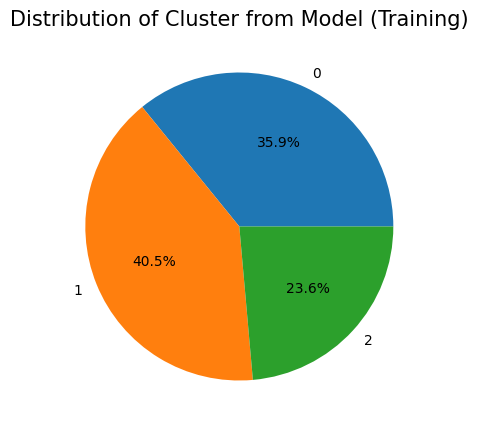

In [48]:
class_distribution_plot(model_k3[2],"Training")

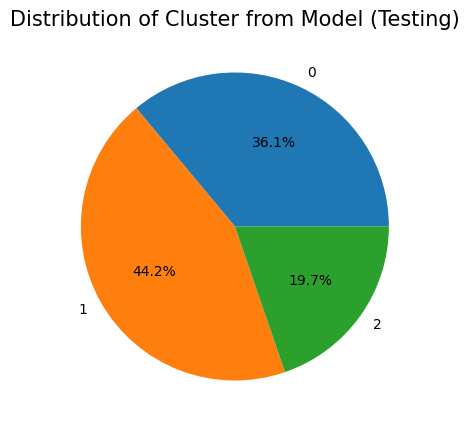

In [49]:
class_distribution_plot(model_k3[3],"Testing")

From the training results, the numbers of customers in cluster 0 and cluster 1 are similar while cluster 0 has the smallest smaller numbers. Before investigating different clusters, a rough assumption is made that a cluster with a smaller number of customers should be a more valuable group and should award customers a higher level of membership. Clusters number 0,1,2 should belong to standard, silver and gold members respectively. The testing results also show a similar distribution.

Pairplot and distributions of the three attributes with the clustering results are visualised in the plot below:

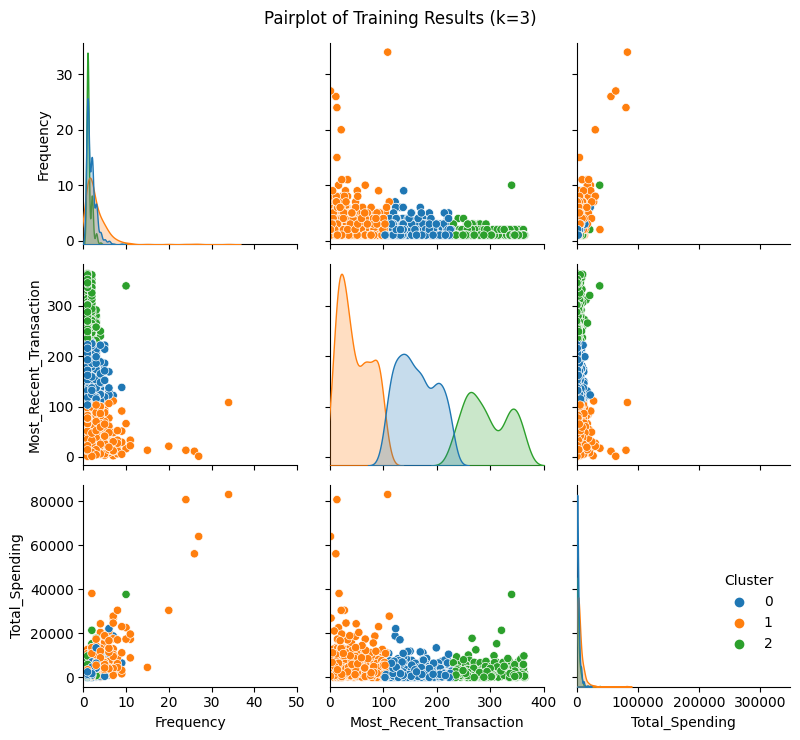

In [50]:
pairplot(train,model_k3[0],"Pairplot of Training Results (k=3)")

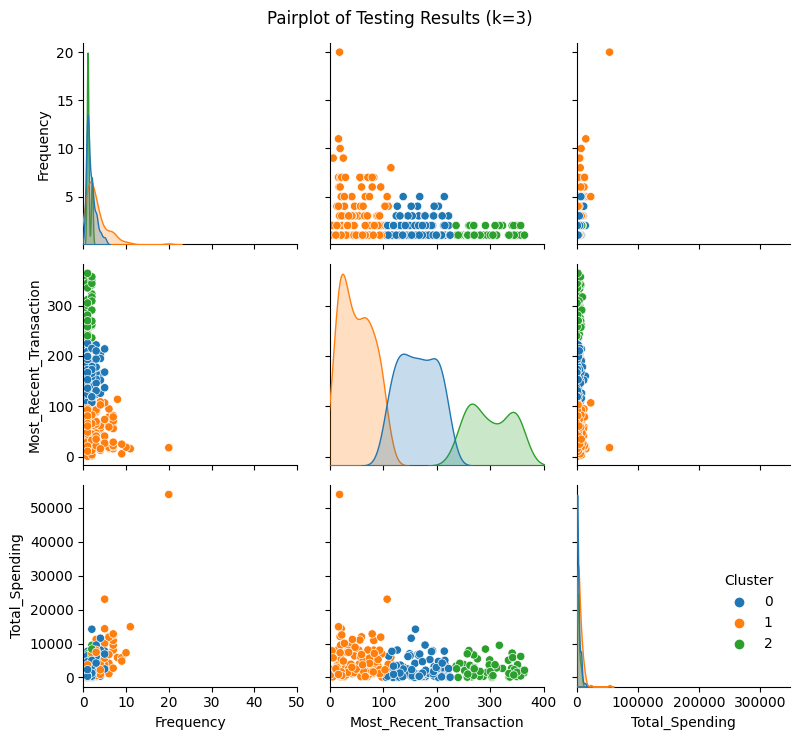

In [51]:
pairplot(test,model_k3[1],"Pairplot of Testing Results (k=3)")

According to the distributions (plots at top-left, middle, bottom-right), customers in cluster 2 have the highest total spending, more recent and highest frequency of transactions. It is followed by cluster 1 then cluster 0. Such order is the most significant in the most recent transaction, while the difference in the distributions of the three clusters in total spending and frequency is much less significant. Both the training and testing results produce similar patterns, so the validity of the models is ensured. In a business sense, customers who spend more, perform transactions more frequently and have more recent transactions are more valuable Therefore, we decided to award customers in **cluster 2 gold memberships**, those in **cluster 1 silver memberships** and those in **cluster 0 standard memberships**.

## **Objective 4**

The Customer Lifetime Value (CLV) calculation is a crucial metric used in business to evaluate the overall value that a customer is expected to bring to the company throughout their relationship. Understanding CLV allows businesses to make informed decisions regarding customer acquisition costs, retention strategies, and overall profitability.

1. **Revenue Estimation:** ARPU represents the average amount of revenue generated from each transaction. By considering this value in the CLV calculation, it provides an estimate of the revenue expected from a customer in each transaction throughout their relationship.
2. **Purchase Frequency:** This metric signifies how often a customer engages in transactions. Multiplying ARPU by Purchase Frequency gives an approximation of the revenue expected from a customer over a certain period.
3. **Tenure:** Multiplying the result by tenure extends this estimation over the entire relationship duration. It accounts for the expected revenue over the entire period the customer is anticipated to remain engaged with the business.


In [52]:
clv_per_customer.head()

,CustomerID,CLV
0,12346,255.99
1,12347,17121.17
2,12348,5963.11
3,12350,1513.95
4,12356,2275.95


The resulting CLV approximation per customer quantifies the anticipated value that each individual is expected to contribute over their relationship lifespan with the company. For instance:`CustomerID: 12347` indicates an estimated CLV of approximately $17121.17.

Understanding CLV per customer is important as it helps businesses identify their most valuable customers, tailor marketing strategies, allocate resources effectivel and focus on customer retention and satisfaction to maximize the overall revenue generated by their customer base.

**Identifying Trends:** (Visualisation 1)
By observing changes in the number of customers and total spend over months, you can identify trends.The combination of transactional data with customer data allows visualising key metrics customer count and total spend over time.

A drop in the number of customers but a consistent or increasing total spend might indicate that while fewer customers are purchasing, they are spending more.

- **Bar Plot (Number of Customers):** Depicts fluctuations or trends in customer engagement throughout the months, aiding in identifying seasonal or periodic variations in customer activity.
- **Line Plot (Total Spend):** Illustrates expenditure patterns over time, highlighting months with high or low spending, providing insights into customer purchasing behavior fluctuations.


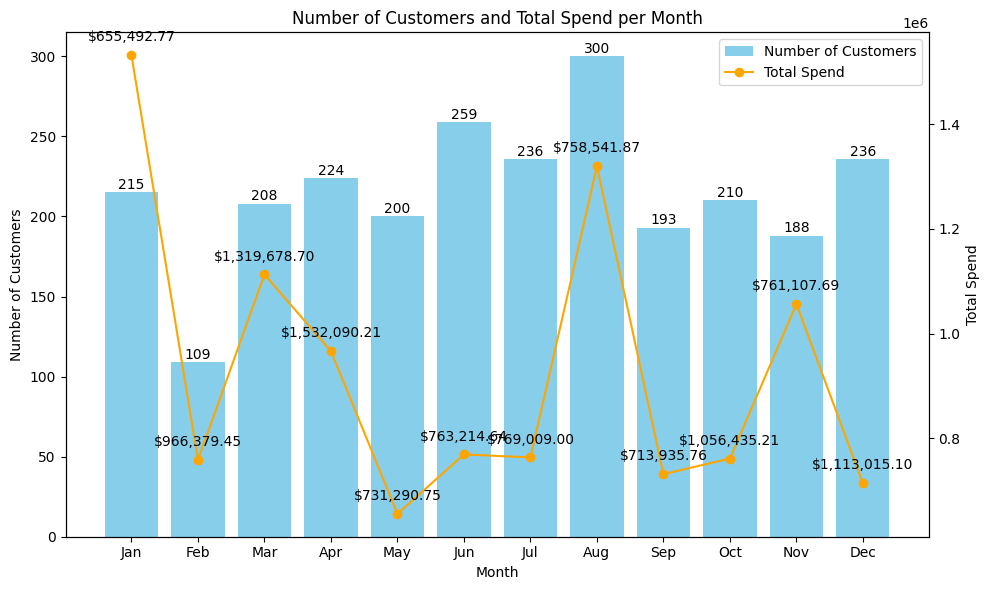

In [53]:
plot_obj4_totalspend()

The visualisation helps spot times when customers are more active or when seasonal trends might influence their participation. By looking at the plot, it seems there's a possible link between how many customers there are and how much they spend. The general pattern in this visualisation suggests that when there's more engagement from customers, they tend to spend more.

When there's a drop in the number of customers but the total spending stays steady or goes up, it could mean that although fewer people are buying things, they're spending more individually. For instance, between October and November, even though there were fewer customers, the overall spending increased noticeably. This might show that the remaining customers were spending more per purchase.

Moving from November to December, there's an increase in the number of customers, but the total spending goes down. This could hint that customers might not spend as much during these months. This kind of insight helps businesses understand when and how customers tend to engage or spend during different times of the year, guiding their strategies accordingly.

**Trends over Time:** (Visualisation 2)
Analysing CLV trends over time involves examining how customer lifetime value changes across different time periods. Understanding how CLV changes over time can reveal seasonal variations or sudden shifts in customer behaviour. Additionally,tracking CLV trends assists in making informed business decisions.

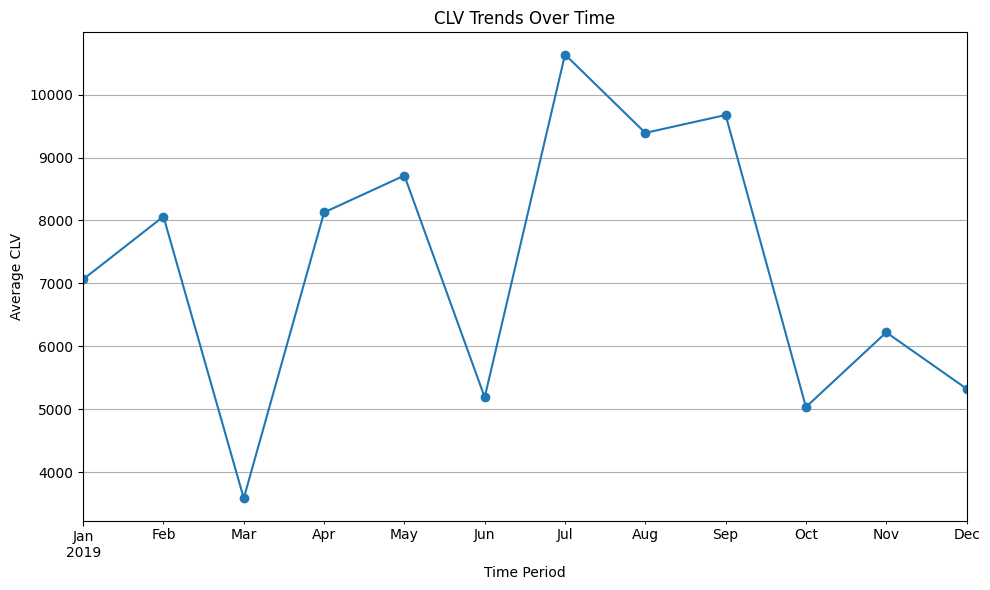

In [54]:
plot_obj4_clvovertime()

**Interpreting the visualisation:**
- **Overall Trend:** The overall trend suggests that every month there is either an increase or decrease in average CLV value, this indicates that there is less stability of customer lifetime.
- **Variations:** Fluctuations, spikes and dips indicate periods where CLV changes drastically. As seen in the plot above, from Febuary to March there is a dip in the average CLV value by more than 50% suggesting that maybe the purchases made by customers were significantly lower in this period, the business should look into offering promotional strategies to encourage their customers to make purchases. The June to July has a visible spike, indicating that since this is the summer holiday season, a lot of purchases were made favourable to the business.

Therefore, examining the overall trajectory helps in understanding the long-term performance of customer value generation. Steady growth or decline in CLV can offer insights into the business's overall health.

# Conclusion

### Achievements
Four achievements have been accomplished in this project.

In the analysis and visualisation of the locational distribution of customers, Chicago is found to have the largest number of customers while Washington State and New Jersey State have the highest amount of average transactions per user. Sales have a positive relationship with the number of customers indicating that more customers yield more sales.

The analysis of effectiveness of marketing and coupons yields interesting results. The efficacy of coupons seems to be outweighed by the presence of a festive occasion. Consequently, December, which has Christmas and the highest discount band, i.e. 30%, enjoyed the highest level of sale. The sales value of the other months with the highest discount band paled in comparison to their neighbouring months which contained any festivities. Marketing spend on the other hand, shows high potency in driving sales.

Customer segmentation is also conducted to enhance our customer loyalty programme by performing K-Means clustering on the RFM information derived from the dataset. The existing customers are clustered into three classes of membership (standard, silver and gold) since k=3 has the best-compromised silhouette score.

The investigation of Customer Lifetime Value (CLV) offers a comprehensive understanding of customer worth and behaviour, which is crucial for strategic business decisions. This analysis aids in identifying and prioritising high-value customers, refining retention strategies, and optimising resource allocation. Observing trends, such as the inverse relationship between customer volume and individual spending or seasonal fluctuations, provides a roadmap for informed decision-making. Adapting strategies based on these insights enables businesses to capitalise on peak periods and navigate slower seasons adeptly.

Ultimately, maintaining a balance between acquiring new customers and nurturing existing relationships is fundamental for sustained profitability and organisational growth.

### Limitations
For the customer segmentation task, silhouette scores help us identify the best number of clusters (i.e. k). k=2 is found to have the best silhouette scores but having only two types of membership is believed to be too few strategically. When choosing k=3, the number of gold members accounts for 44.2% of the customers in the testing set, which contradicts the business sense. Sometimes we have to compromise the trade-off between results from the business model and actual strategies.

### Future Work
From a business point of view, business strategies can be further planned and executed. The four achievements in this project offer a comprehensive understanding of customer worth and behaviour, which is crucial for precise and effective strategic business decisions. The company should further investigate and replicate successful marketing strategies from Illinois, Washington and New Jersey locationally and high-class members demographically, to analyse the factors contributing to customer engagement so as to leverage the revenue. From a building point of view, specifically for the clustering model, performing model parameters tuning by segmenting an evaluation set, and introducing more evaluation metrics can ensure a more reliable model, so that we can target customers more precisely and hopefully avoid the issue of the unreasonable proportional distribution of different classes of membership.